# A tutorial for EARS33 based on another tutorial

For the last portion of this workshop session we will look at a very real example of how my students and I bring together all sorts of exploratory data analysis and tons of different kinds of Python packages - from mathematical packages like `numpy` and `scipy` to data analysis and visualization tools like `pandas` and `seaborn` to geospaital tools in `geopandas`. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import geopandas as gpd
import seaborn as sns

# Existing shapefile example: permafrost extent

<AxesSubplot: >

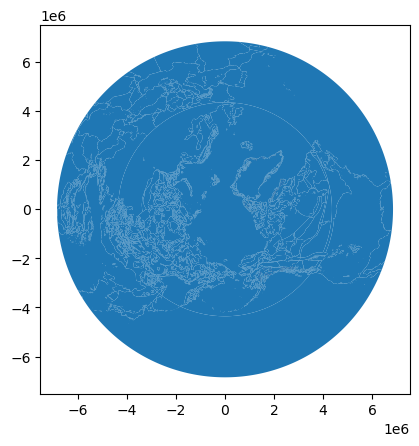

In [2]:
# The "./" is the current directory, so it's saying "go into arctic-data and get this shapefile"
permafrost = gpd.read_file("./arctic-data/permaice.shp")

permafrost.plot()

OK, but this blue is boring. What is even in this object anyway?

In [3]:
permafrost.head()

,NUM_CODE,COMBO,RELICT,EXTENT,CONTENT,LANDFORM,geometry
0,25,ld,None,None,None,None,"POLYGON ((581712.750 6820943.500, 586466.250 6..."
1,25,ld,None,None,None,None,"POLYGON ((1423419.250 6696661.000, 1418877.625..."
2,25,ld,None,None,None,None,"POLYGON ((-1051845.875 6260668.000, -1062108.5..."
3,25,ld,None,None,None,None,"POLYGON ((1423419.250 6696661.000, 1429262.625..."
4,25,ld,None,None,None,None,"POLYGON ((993675.250 6519059.000, 1069490.500 ..."


That's right, geopandas GeoDataFrames are just dataframes with some spatial info! We can look at the columns to see attributes for the shapefiles. "COMBO" is the three letter combination of permafrost extent, ice content, and overburden (soil) thickness. Read the user manual [here](https://nsidc.org/sites/default/files/ggd318-v002-userguide.pdf)

<AxesSubplot: >

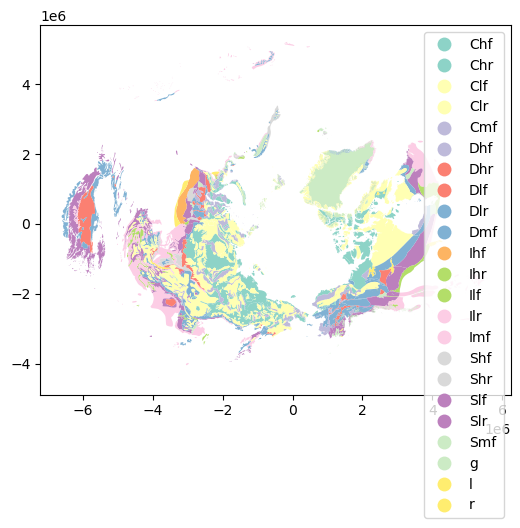

In [4]:
# This says plot permafrost where permafrost's propetery "COMBO" is not equal to the value "o" and where permafrost's propetery "COMBO" is not equal to the value "ld"
# This stops it from plotting "ocean" and "land"
permafrost[(permafrost["COMBO"] != 'o') & ((permafrost["COMBO"] != 'ld'))].plot(column="COMBO", cmap="Set3", legend=True)


Shapefiles will have a coordinate reference system

In [5]:
permafrost.crs

<Derived Projected CRS: PROJCS["Sphere_ARC_INFO_Lambert_Azimuthal_Equal_Ar ...>
Name: Sphere_ARC_INFO_Lambert_Azimuthal_Equal_Area
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Azimuthal Equal Area (Spherical)
Datum: D_Sphere_ARC_INFO
- Ellipsoid: Sphere_ARC_INFO
- Prime Meridian: Greenwich

# Example of taking pandas data with lat and long columns and turning it into a shapefile

Sade took this [fairly messy data](https://www2.gwu.edu/~calm/data/north.htm) and turned it into something great!

In [6]:
data= pd.read_csv('./arctic-data/CALM_data_analysis.csv')
data

,Unnamed: 0,Site_Code,Site_Name,Latitude,Longitude,Method,URL,1990,1991,1992,...,2013,2014,2015,average,slope,intercept,rvalue,pvalue,stderr,geometry
0,0,U1,Barrow,71.316667,-156.600000,1000/T,www.gwu.edu/~calm/data\webforms\u1_f.htm,NaN,NaN,NaN,...,41.0,34.0,40.0,35.565217,0.189723,-344.640316,0.323697,0.131880,0.121015,POINT (821420.4970633475 -1898190.771217716)
1,1,U2,"Barrow, CRREL Plots",71.316667,-156.583333,10/T,www.gwu.edu/~calm/data\webforms\u2_f.htm,NaN,23.0,23.0,...,40.0,34.0,39.0,34.666667,0.395958,-758.454306,0.590866,0.002364,0.115265,POINT (821972.6346579046 -1897951.7445934832)
2,2,U3,Atkasuk,70.450000,-157.400000,1000/T,www.gwu.edu/~calm/data\webforms\u3_f.htm,NaN,NaN,NaN,...,58.0,52.0,54.0,48.200000,0.471501,-897.088554,0.528563,0.016578,0.178485,POINT (831357.444908967 -1997207.9855167598)
3,3,U4,West Dock 1 ha grid,70.366667,-148.550000,100/T/B56,www.gwu.edu/~calm/data/webforms/u4_f.htm,NaN,NaN,NaN,...,35.0,31.0,37.0,30.800000,0.099248,-168.242105,0.182255,0.441856,0.126203,POINT (1133490.7046692744 -1853317.1102819608)
4,4,U5,West Dock 1 km grid,70.366667,-148.566667,1000,www.gwu.edu/~calm/data/webforms/u5_f.htm,NaN,NaN,NaN,...,54.0,48.0,54.0,50.000000,-0.108696,267.826087,-0.184302,0.399878,0.126493,POINT (1132951.537842803 -1853646.7575390823)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,244,CN10,Deep Borehole,43.116667,86.850000,T,www.gwu.edu/~calm/data\webforms\cn_f.html,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-5061300.098125596 278540.1980782853)
229,245,CN11,Shallow Borehole,43.100000,86.816667,T,www.gwu.edu/~calm/data/webforms/cn_f.html,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-5062834.843062365 281579.08425191033)
230,247,K0,Northern Tien Shan; Cosmostation,43.083333,76.916667,T/B25,www.gwu.edu/~calm/data\webforms\k_f.html,480.0,510.0,510.0,...,NaN,NaN,NaN,510.727273,5.016375,-9524.530774,0.604808,0.002865,1.476976,POINT (-4940690.213222994 1148219.6841167053)
231,248,K1,Northern Tien Shan; Cosmostation,43.083333,76.916667,T/B14,www.gwu.edu/~calm/data/webforms/k_f.html,450.0,490.0,460.0,...,NaN,NaN,NaN,483.842105,0.630097,-776.219417,0.169897,0.486823,0.886414,POINT (-4940690.213222994 1148219.6841167053)


# Now make it a map!

Any dataframe with lats and longs can be convered into a dataframe if we specify the geometry as the appropriate columns and the appropriate crs (lat long will usually be WGS84, EPSG:4326)

In [7]:
gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude), crs='epsg:4326')

Let's see what this looks like

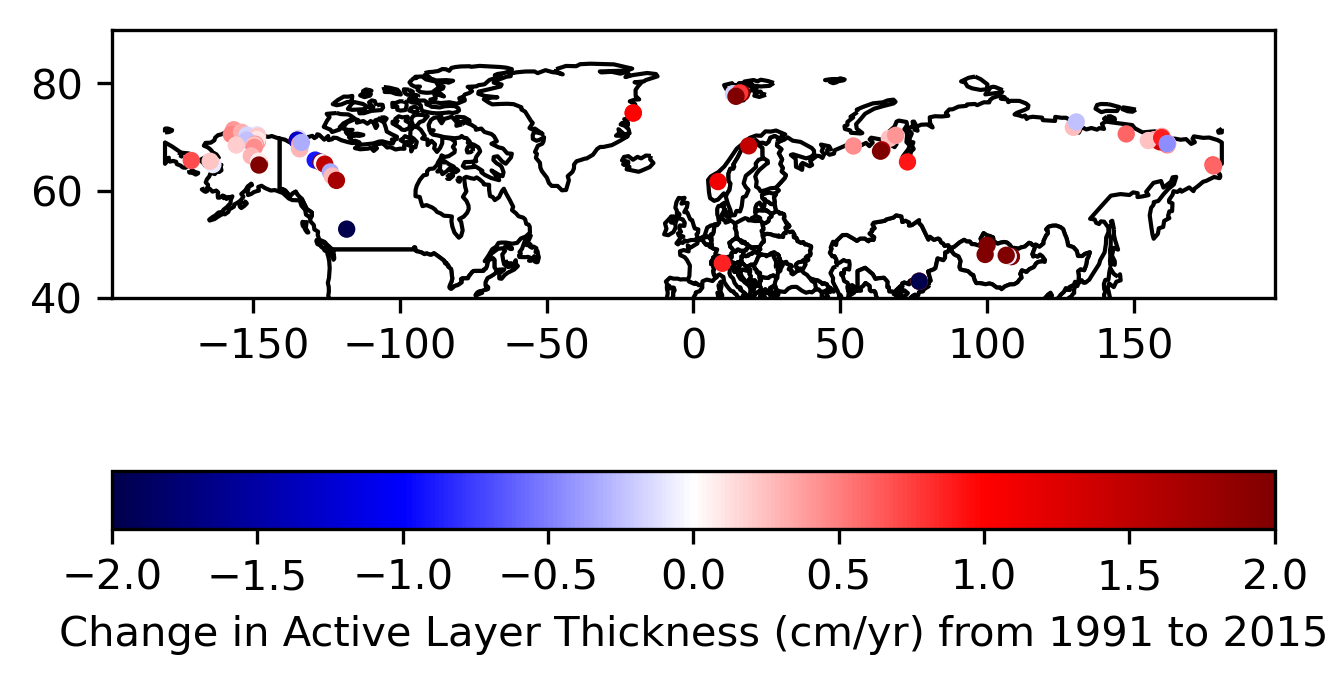

In [8]:
# GeoPandas has a simple map of the Earth built in
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(5,5),dpi=300)
im = world.plot(
    color='white', edgecolor='black', ax=ax)

gdf.plot(
        ax=ax,
        column='slope',
        vmin=-2,
        vmax=2,
        cmap='seismic',
        s=10, #size of point
        legend=True,
        legend_kwds={
            'label': "Change in Active Layer Thickness (cm/yr) from 1991 to 2015",
            'orientation': "horizontal"
            }
        )

ax.set_ylim(40,90)
plt.show()

I will leave [axis labeling](https://matplotlib.org/stable/api/axes_api.html) to you :)

## Let's export this as a shapefile for use later down the road

In [9]:
# A goofy little thing where the numbers have to be strings to export lol
gdf.columns = gdf.columns.astype(str)

gdf.dropna(inplace=True, subset='Site_Name')

gdf.to_file("CALM_points.shp")

# Spatial join with our permafrost layer

We will perform a [spatial join](https://geopandas.org/en/stable/gallery/spatial_joins.html) to determine within which permafrost category each of these data points fall

In [10]:
joined_data = gdf.to_crs(permafrost.crs).sjoin(permafrost, how="inner") 

Let's check out the result:

In [11]:
joined_data

,Unnamed: 0,Site_Code,Site_Name,Latitude,Longitude,Method,URL,1990,1991,1992,...,pvalue,stderr,geometry,index_right,NUM_CODE,COMBO,RELICT,EXTENT,CONTENT,LANDFORM
0,0,U1,Barrow,71.316667,-156.600000,1000/T,www.gwu.edu/~calm/data\webforms\u1_f.htm,NaN,NaN,NaN,...,0.131880,0.121015,POINT (821420.497 -1898190.771),8888,1,Chf,None,C,h,None
1,1,U2,"Barrow, CRREL Plots",71.316667,-156.583333,10/T,www.gwu.edu/~calm/data\webforms\u2_f.htm,NaN,23.0,23.0,...,0.002364,0.115265,POINT (821972.635 -1897951.745),8888,1,Chf,None,C,h,None
2,2,U3,Atkasuk,70.450000,-157.400000,1000/T,www.gwu.edu/~calm/data\webforms\u3_f.htm,NaN,NaN,NaN,...,0.016578,0.178485,POINT (831357.445 -1997207.986),8888,1,Chf,None,C,h,None
3,3,U4,West Dock 1 ha grid,70.366667,-148.550000,100/T/B56,www.gwu.edu/~calm/data/webforms/u4_f.htm,NaN,NaN,NaN,...,0.441856,0.126203,POINT (1133490.705 -1853317.110),8888,1,Chf,None,C,h,None
4,4,U5,West Dock 1 km grid,70.366667,-148.566667,1000,www.gwu.edu/~calm/data/webforms/u5_f.htm,NaN,NaN,NaN,...,0.399878,0.126493,POINT (1132951.538 -1853646.758),8888,1,Chf,None,C,h,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,244,CN10,Deep Borehole,43.116667,86.850000,T,www.gwu.edu/~calm/data\webforms\cn_f.html,NaN,NaN,NaN,...,NaN,NaN,POINT (-5061300.098 278540.198),13601,25,ld,None,None,None,None
229,245,CN11,Shallow Borehole,43.100000,86.816667,T,www.gwu.edu/~calm/data/webforms/cn_f.html,NaN,NaN,NaN,...,NaN,NaN,POINT (-5062834.843 281579.084),13601,25,ld,None,None,None,None
230,247,K0,Northern Tien Shan; Cosmostation,43.083333,76.916667,T/B25,www.gwu.edu/~calm/data\webforms\k_f.html,480.0,510.0,510.0,...,0.002865,1.476976,POINT (-4940690.213 1148219.684),3588,18,Dlr,None,D,l,r
231,248,K1,Northern Tien Shan; Cosmostation,43.083333,76.916667,T/B14,www.gwu.edu/~calm/data/webforms/k_f.html,450.0,490.0,460.0,...,0.486823,0.886414,POINT (-4940690.213 1148219.684),3588,18,Dlr,None,D,l,r


In [12]:
joined_data.columns

Index(['Unnamed: 0', 'Site_Code', 'Site_Name', 'Latitude', 'Longitude',
       'Method', 'URL', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', 'average', 'slope', 'intercept', 'rvalue', 'pvalue', 'stderr',
       'geometry', 'index_right', 'NUM_CODE', 'COMBO', 'RELICT', 'EXTENT',
       'CONTENT', 'LANDFORM'],
      dtype='object')

# Visualize and analyze results

I asked Sade, "Ok, so is continuous permafrost thawing faster or slower than discontinuous permafrost?" Let's see what she came up with:

In [13]:
# Make individual data frames for each extent category - it's just a little easier this way
df_cont=joined_data.loc[joined_data['EXTENT']=='C']
df_discont=joined_data.loc[joined_data['EXTENT']=='D']
df_iso=joined_data.loc[joined_data['EXTENT']=='I']
df_spor=joined_data.loc[joined_data['EXTENT']=='S']

# And make them a list
df_extent_list=[df_cont,df_discont,df_iso,df_spor]

Next, she wrote a function to plot each type of permafrost in one of the four plot boxes

In [14]:
def plot_site_timeseries(df, axis):
  for sites in range(len(df)):
    y_floats = np.array(df.iloc[sites, 7:33].values, dtype=float)
    y = y_floats[~np.isnan(y_floats)]
    x = year_names[~np.isnan(y_floats)]
    if np.sum([np.isnan(y)==False])>10:
      fig=sns.regplot(x=x,y=y, ax=axis, 
                      color= color_dict[df.iloc[sites]['EXTENT']], scatter_kws={'alpha':0.5, "s":.25}, line_kws={"lw":.25})
    else:
      continue
      # fig.set(xlabel='Year', ylabel='Active Layer Thickness', title ='Change in ALT from 1991-2015', ylim=(0, 200)

And then ran that function on each category for a figure!

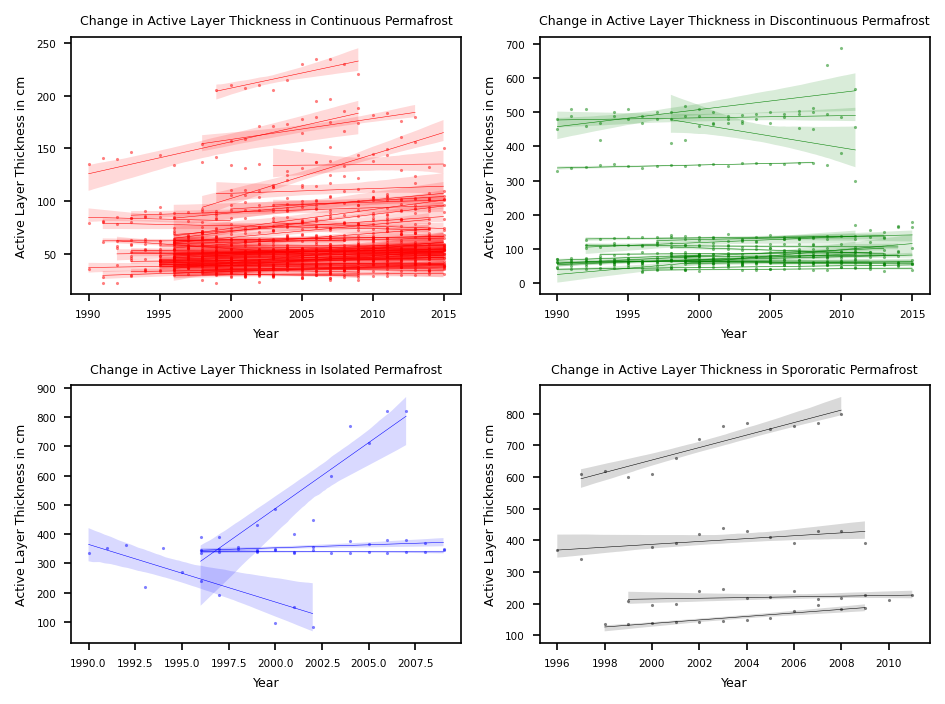

In [15]:
# This is a color dictionary that tells the function which color to make which category
color_dict = {'C':'r', 'D':'g', 'I':'b' , 'S':'k', 'no_data':'grey'}

year_names = np.arange(1990, 2016, 1)

fig, ax = plt.subplots(2,2, dpi=150)

# Each category got a call and a designated axis
plot_site_timeseries(df_extent_list[0], ax[0,0])
plot_site_timeseries(df_extent_list[1], ax[0,1])
plot_site_timeseries(df_extent_list[2], ax[1,0])
plot_site_timeseries(df_extent_list[3], ax[1,1])

# These are setting labels
ax[0,0].set_title('Change in Active Layer Thickness in Continuous Permafrost', fontsize=6)
ax[0,0].set_ylabel('Active Layer Thickness in cm',fontsize=6)
ax[0,0].set_xlabel('Year',fontsize=6)
ax[0,0].tick_params(axis='both', which='major', labelsize=5)
ax[0,1].set_title('Change in Active Layer Thickness in Discontinuous Permafrost', fontsize=6)
ax[0,1].set_ylabel('Active Layer Thickness in cm',fontsize=6)
ax[0,1].set_xlabel('Year',fontsize=6)
ax[0,1].tick_params(axis='both', which='major', labelsize=5)
ax[1,0].set_title('Change in Active Layer Thickness in Isolated Permafrost', fontsize=6)
ax[1,0].set_ylabel('Active Layer Thickness in cm',fontsize=6)
ax[1,0].set_xlabel('Year',fontsize=6)
ax[1,0].tick_params(axis='both', which='major', labelsize=5)
ax[1,1].set_title('Change in Active Layer Thickness in Spororatic Permafrost', fontsize=6)
ax[1,1].set_ylabel('Active Layer Thickness in cm',fontsize=6)
ax[1,1].set_xlabel('Year',fontsize=6)
ax[1,1].tick_params(axis='both', which='major', labelsize=5)
plt.tight_layout()

OK, so let's see how the change in ALT varies with permafrost extent:

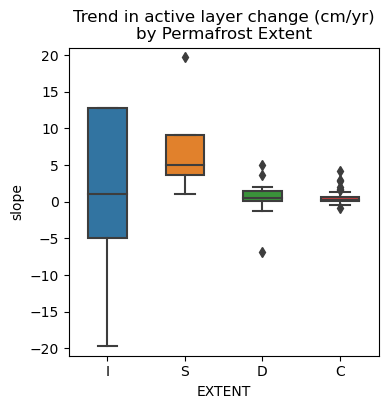

In [16]:
fig, ax= plt.subplots(figsize=(4,4), dpi=100)
ax.set_ylim([-21,21])
fig4=sns.boxplot(data=joined_data, y='slope', x='EXTENT',order=["I", "S", "D", "C"], width=.5).set(title='Trend in active layer change (cm/yr)\nby Permafrost Extent')

Those "D" and "C" distributions look pretty similar actually! To check it out statistically, Sade performed a [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html):

In [17]:
# Get the ALT change data as two arrays 
df_C_slope=joined_data.loc[joined_data['EXTENT']=='C']['slope'].dropna().values
df_D_slope=joined_data.loc[joined_data['EXTENT']=='D']['slope'].dropna().values

stats.ttest_ind(df_C_slope, df_D_slope)


Ttest_indResult(statistic=-0.2173250486194453, pvalue=0.8284948797920801)

So what's the answer to my term-long query? :)